In [1]:
#Basic libraries for visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#For text processing 
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from skimage import io
#For saving the required files
import pickle
#To prevent kernel from showing any warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,760161,Orphan: First Kill,Horror-Thriller,en,After escaping from an Estonian psychiatric fa...,8098.027,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,9572765.0,99.0,Released,There's always been something wrong with Esther.,6.963,821.0,Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...,psychopath-family secrets-prequel-murder-imper...,/wSqAXL1EHVJ3MOnJzMhUngc8gFs.jpg,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,606237-818502-744276-721930-1001925-762504-982...
1,718930,Bullet Train,Action-Comedy-Thriller,en,Unlucky assassin Ladybug is determined to do h...,7949.491,Columbia Pictures-87North Productions,2022-07-03,90000000.0,231398720.0,126.0,Released,The end of the line is just the beginning.,7.497,1238.0,Brad Pitt-Joey King-Aaron Taylor-Johnson-Brian...,japan-assassin-based on novel or book-mission-...,/tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg,/y2Ca1neKke2mGPMaHzlCNDVZqsK.jpg,1002564-762504-755566-1002171-682507-884453-55...
2,744276,After Ever Happy,Romance-Drama,en,As a shocking truth about a couple's families ...,4017.342,Voltage Pictures-Vertical Entertainment-CalMap...,2022-08-24,0.0,0.0,95.0,Released,They can't stop loving each other.,6.830,215.0,Josephine Langford-Hero Fiennes Tiffin-Louise ...,based on novel or book-love-teenage crush,/6b7swg6DLqXCO3XUsMnv6RwDMW2.jpg,/rwgmDkIEv8VjAsWx25ottJrFvpO.jpg,20966-676701-419669-804251-766907-619803-67670...
3,579974,RRR,Action-Drama,te,A fictional history of two legendary revolutio...,3416.323,Lyca Productions-DVV Entertainment-Pen Studios,2022-03-24,69000000.0,160000000.0,182.0,Released,"Rise, roar, revolt.",7.774,370.0,N.T. Rama Rao Jr.-Ram Charan-Alia Bhatt-Ajay D...,revolution-liberation-slavery-freedom fighter-...,/wE0I6efAW4cDDmZQWtwZMOW44EJ.jpg,/i0Y0wP8H6SRgjr6QmuwbtQbS24D.jpg,601337-889741-587412-766116-792358-680058-2372...
4,532639,Pinocchio,Fantasy-Adventure-Family,en,A wooden puppet embarks on a thrilling adventu...,3239.378,Walt Disney Pictures-Depth of Field,2022-09-07,0.0,0.0,105.0,Released,The timeless classic.,6.753,800.0,Benjamin Evan Ainsworth-Tom Hanks-Joseph Gordo...,fairy-musical-puppet-live action and animation...,/g8sclIV4gj1TZqUpnL82hKOTK3B.jpg,/nnUQqlVZeEGuCRx8SaoCU4XVHJN.jpg,985939-610150-760741-921360-576925-616037-5799...


In [8]:
df.shape

(744493, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744493 entries, 0 to 744492
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    744493 non-null  int64  
 1   title                 744489 non-null  object 
 2   genres                523793 non-null  object 
 3   original_language     744493 non-null  object 
 4   overview              623360 non-null  object 
 5   popularity            744493 non-null  float64
 6   production_companies  345206 non-null  object 
 7   release_date          687712 non-null  object 
 8   budget                744493 non-null  float64
 9   revenue               744493 non-null  float64
 10  runtime               706032 non-null  float64
 11  status                744493 non-null  object 
 12  tagline               109989 non-null  object 
 13  vote_average          744493 non-null  float64
 14  vote_count            744493 non-null  float64
 15  

In [10]:
#to check any null values
df.isnull().sum()

id                           0
title                        4
genres                  220700
original_language            0
overview                121133
popularity                   0
production_companies    399287
release_date             56781
budget                       0
revenue                      0
runtime                  38461
status                       0
tagline                 634504
vote_average                 0
vote_count                   0
credits                 231329
keywords                529469
poster_path             199099
backdrop_path           519126
recommendations         700806
dtype: int64

In [13]:
#to check if there are any duplicates
df.duplicated().sum()

173

In [14]:
#to remove duplicate values, we use drop_duplicate function
df.drop_duplicates(inplace = True)

In [15]:
#to check the duplicate values
df.duplicated().sum()

0

In [17]:
#to check the same movies, since we are opting for content based recommendation system
df['title'].duplicated().sum()

168414

In [20]:
#Some titles may be similar for different movies, so we check based upon release date and title
df[['title', 'release_date']].duplicated().sum()

84371

In [21]:
#to remove these 84371 duplicates
df.drop_duplicates(subset = ['title', 'release_date'], inplace = True)

In [23]:
df.shape

(659949, 20)

In [25]:
#since most of the duplicate values have been removed, but it is important that we consider the votes of the movies. 
#for this purpose, we will consider those movies that have more than 20 votes
df1 = df[df.vote_count >= 20].reset_index()
#reset index basically resets the index
#for example, if the first movie has a rating < 20, it will be removed and instead of having no value in that row, you get 1

In [28]:
df1.isnull().sum()

index                       0
id                          0
title                       0
genres                    179
original_language           0
overview                  475
popularity                  0
production_companies     3306
release_date                2
budget                      0
revenue                     0
runtime                    16
status                      0
tagline                 20420
vote_average                0
vote_count                  0
credits                   647
keywords                 9576
poster_path               138
backdrop_path            2436
recommendations         11658
dtype: int64

In [30]:
df1.fillna('', inplace = True)

In [32]:
#to check for values that have null values in columns 'genres' and 'overview'
#this is because we need to suggest movies based upon genres and the view of the user
null_genre = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [34]:
#dropping null values calculated above
df1.drop(null_genre, inplace = True)

index                   0
id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vote_count              0
credits                 0
keywords                0
poster_path             0
backdrop_path           0
recommendations         0
dtype: int64

In [63]:
#this is a new learning stage for me
#in order to remove '-' we use lambda function
#make sure to search more about lambda function
#genre, credits and keywords are seperated with -, so we are removing the - and joining them with '' 
#for this purpose, the lambda function has been used
#lambda function is being used to perform multiple functions on a single column
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: '  '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x:'  '.join(x.split('-')))

In [64]:
df1['tags'] = df1['overview'] + ' ' + df1['genres'] + ' ' + df1['keywords'] + ' ' + df1['credits'] + ' ' + df1['original_language']

In [68]:
#applying stemming to stem tags
#stemming is used to find the stem or root of a word
#this word is then later on converted into a vector for the computer to understand
stemmer = SnowballStemmer('english')
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)
df1['tags'] = df1['tags'].apply(stem)

#breakdown
#the stem function takes a blank value of y
#for every value i in the text is split in different words, and is stemmed which is then appended with y
#then the stemmed value is joined with y
#The stem function is then applied to the new column tag


In [71]:
# TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. 
#This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix =tfidf.fit_transform(df1['tags'])

#tf is term frequency, which is the occurence of word divided by total words in a sentence
#idf is inverse document frequency, which is calculated by log(words/total words in all sentences)
#this method is basically used to create values that are readable by the computer
#higher word frequency means that this particular word is more important for the document, or in our case, a particular column
#fit_transform is basically for running the algorithm
#fit means feeding data to the computer, transform means that the data will be converted into vectors


Creating Recommendation Model Which takes input from a particular movie name and suggests relevant movies to you


In [78]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    #the index of a particular movie title will be called
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')
#\n is used to end the function at that particular line



    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))
    #cosine similarity is the cosine of the angle formed between two vectors
    #the cosine similarity is a value between 0 and 1 where 1 being the most relevant and 0 being the least relevant
    #the angle between tags column and the title of the movie is formed using this function
    #enumerate function provides the location of a certain value in a list
    

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #reverse here means the values will be sorted in an ascending order

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

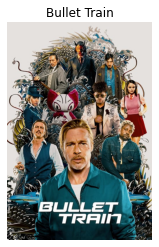

Recommendations



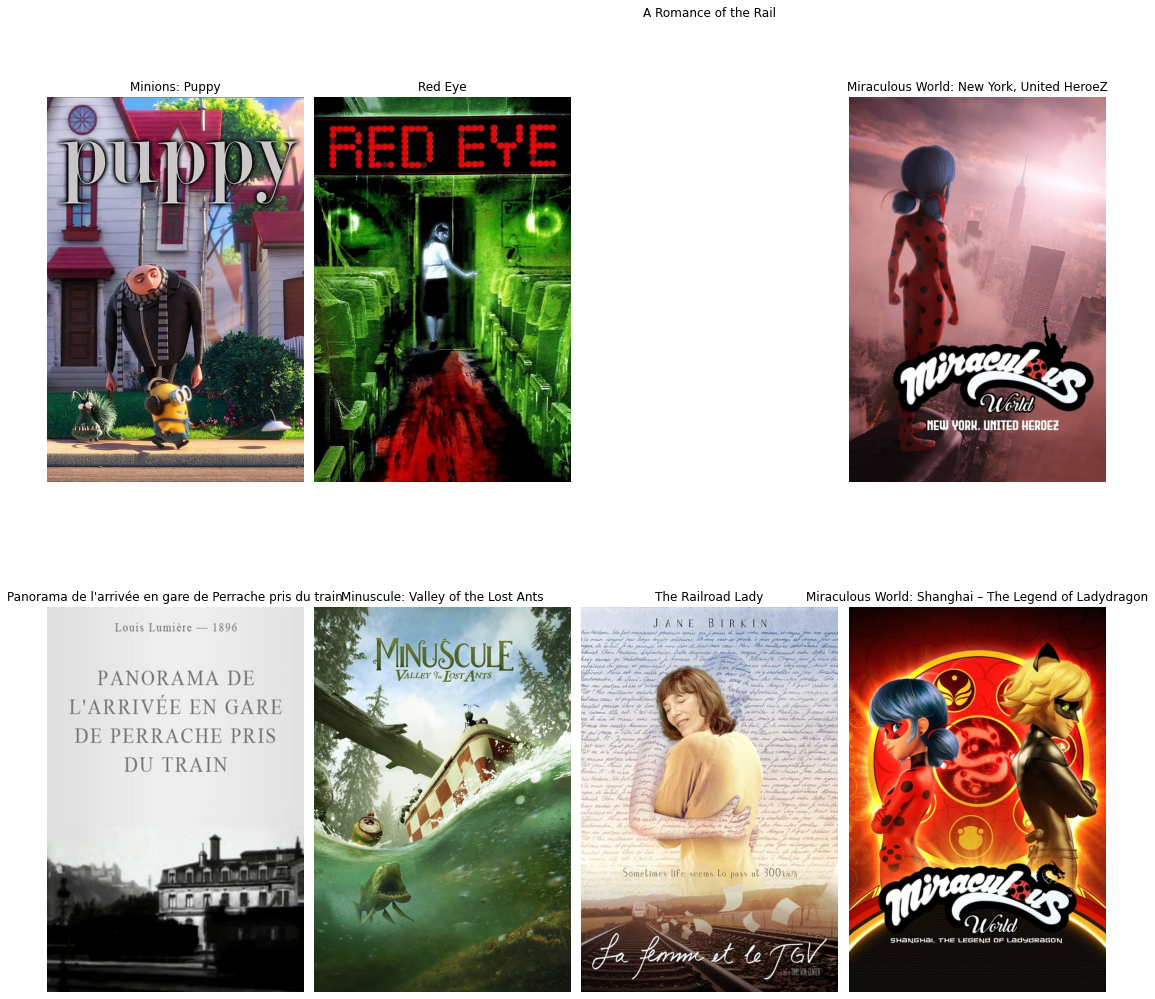

In [82]:
get_recommendations('Bullet Train')